Use shift-enter to execute each code cell. Some cells require earlier cells, so run them all. 

In [48]:
# This loads numerous packages and defines functions I used in these notes

%run -i "controls_imports.py"

In [49]:
# Do we really need to see more decimal places.
%precision 5

'%.5f'

## Introduction:

I'm going to start using more coding in class here. Because I can integrate it live with notes, I'll be using Python. Specifically, I'll be using the [Python Control Systems Library](https://python-control.readthedocs.io/en/0.8.3/) with an emphasis on trying to stay within the [MATLAB compatibility module](https://python-control.readthedocs.io/en/0.8.3/matlab.html). This means that much of the syntax will look the same as [Matlab](http://mathworks.com). However, it won't be 100%. Many of the commands will be preceded by ``ctrl.``. This is a python technique that allows the usage of a variable or function name in multiple places. For example, later in the course I will solve for eigenvalues. The Matlab command is ``eig``. However, I might personally want to call my eigenvalue variable ``eig``. You can't do that in Matlab. ``eig`` is already taken. You can "deal with it". In python, however, when I ``import`` (make ready for usage) the ``eig command``, I will do it in the following form:

````
import numpy.linalg as la  # Only has to be done once before using it as many times as wanted.
eig = la.eig(A) # Presuming A has already been defined
````

So, now my eigenvalues are in the variable ``eig``. 

Python is easy enough you will be able to read what I'm doing and understand it. I will comment the code as I think is necessary. If you know Matlab, you will be able to replicate it there just fine. 

I could use Matlab in these notes. However, running Matlab within notebooks takes that much more expertise to get working. Click [how to use Matlab within jupyter notebooks](https://am111.readthedocs.io/en/latest/jmatlab_install.html) is you want to try it. I've done it. I simply know it's unlikely many of you will want to do so, so I'd rather give you code you can run as long as Python is installed (which already had to happen just to *have* this notebook). 

As always, please reach out to me. I'm happy to provide support to get things working. I won't help on getting Matlab working in [jupyter](http://jupyter.org)- it's a bit more fragile and you will have to learn to maintain it. 

The text covers the polynomial tools in Matlab. I placed a module in the public repository illustrating the same in Python. I don't think it's necessary, but if I'm wrong, it is there. 

Here we start with the controls functions. 

Please follow along in your text for figures. 


In [3]:
# Let's start by defining a transfer function.

num1 = 10
den1 = [
    1,
    2,
    5,
]  # Matlab doesn't require the commas. Use them. Trust me. Using spaces increase chances for errors.
sys1 = ctrl.tf(num1, den1)  # This is the same command (tf) as Matlab
sys1


      10
-------------
s^2 + 2 s + 5

In [4]:
# We can create another:

num2 = 1
den2 = [1, 1]
sys2 = ctrl.tf(num2, den2)
sys2


  1
-----
s + 1

In [5]:
# If they are in parallel, they add. So we can add them:

sys1 + sys2


   s^2 + 12 s + 15
---------------------
s^3 + 3 s^2 + 7 s + 5

In [6]:
# If we need to divide them, that works too:

sys1 / sys2


  10 s + 10
-------------
s^2 + 2 s + 5

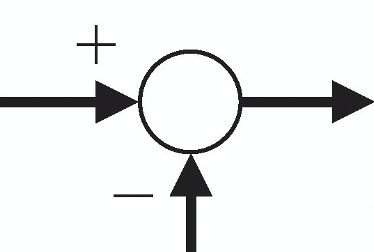

In [7]:
# If they lead into a summation block and one is negative at entrance, we can subtract them.

sys1 - sys2


    -s^2 + 8 s + 5
---------------------
s^3 + 3 s^2 + 7 s + 5

In [8]:
# We can find the poles and zeros:

sys = ctrl.tf([1, 10], [1, 2, 3])
p = ctrl.pole(sys)
z = ctrl.zero(sys)
print("Poles: {}   Zeros: {}".format(p, z))

Poles: [-1.+1.41421j -1.-1.41421j]   Zeros: [-10.]


In [9]:
sys


    s + 10
-------------
s^2 + 2 s + 3

(array([-1.+1.41421j, -1.-1.41421j]), array([-10.]))

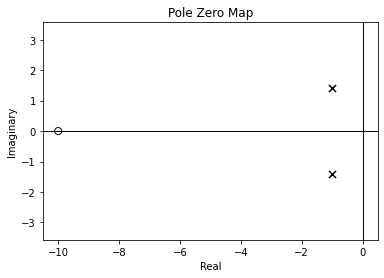

In [10]:
[p, z] = ctrl.pzmap(sys)
p, z

(array([-1.+1.41421j, -1.-1.41421j]), array([], dtype=float64))

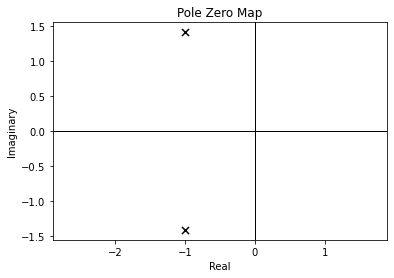

In [50]:
ctrl.pzmap(ctrl.tf(1, [1, 2, 3]))

#### Take another example (similar to 2.15 in the text)

$$
G(s)=\frac{7 s^{2}+1}{s^{3}+3 s^{2}+4 s+1} \text { and } H(s)=\frac{(s+3)(s+2)}{(s+6 i)(s-6 i)(s+4)}
$$

In [11]:
sysg = ctrl.tf([7, 0, 1], [1, 3, 4, 1])
sysg


      7 s^2 + 1
---------------------
s^3 + 3 s^2 + 4 s + 1

The second one looks harder to build. 

We could multiply everything out, but the easier way is to define each portion
in the transfer function as a transfer function itself. Then, multiply and divide them.

In [12]:
# For instance, the top left portion is
ctrl.tf([1, 3], 1)


s + 3
-----
  1

So:

In [55]:
sysh = (
    ctrl.tf([1, 3], 1)
    * ctrl.tf([1, 2], 1)
    / ctrl.tf([1, 6 * i], 1)
    / ctrl.tf([1, -6 * i], 1)
    / ctrl.tf([1, 4], 1)
)
sysh


      s^2 + 5 s + 6
------------------------
s^3 + 4 s^2 + 36 s + 144

Simpler would have been:

In [14]:
sysh = ctrl.tf([1, 3], [1, 6 * i]) * ctrl.tf([1, 2], [1, -6 * i]) / ctrl.tf([1, 4], 1)
sysh


      s^2 + 5 s + 6
------------------------
s^3 + 4 s^2 + 36 s + 144

In [42]:
sys = sysg / sysh
sys


7 s^5 + 28 s^4 + 253 s^3 + 1012 s^2 + 36 s + 144
------------------------------------------------
    s^5 + 8 s^4 + 25 s^3 + 39 s^2 + 29 s + 6

This next command will sometimes throw an irrelevant error the first time it is executed. 
That's all due to minor numerical errors that happen in real computations. That's a bit more honest than suppressing them as you probably should judge for yourself. In the result, you will see that there are tiny errors where some real and some imaginary parts apparently should be actual zero or an integer. The nice thing about an example that should have integer solutions is that it highlights the reality that computers never (rarely return truth mathematically. They return an estimate to within machine precision. 

Poles: [-3.     +0.j      -2.     +0.j      -1.34116+1.16154j -1.34116-1.16154j
 -0.31767+0.j     ]
Zeros: [ 2.66454e-15+6.00000e+00j  1.77636e-15-6.00000e+00j
 -4.00000e+00-2.67912e-16j  9.78287e-17+3.77964e-01j
  1.59300e-16-3.77964e-01j]


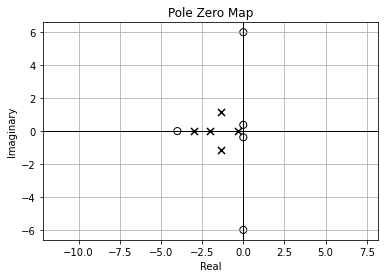

In [56]:
p, z = ctrl.pzmap(sys)
plt.grid(True)
print("Poles: {}\nZeros: {}".format(p, z))  # \n is `new line` in Python and Matlab

## Connecting blocks in block diagrams
We can make series connections of transfer function objects by multiplying them, as the math dictates:

In [17]:
sys1 = ctrl.tf(1, [500, 0, 0])
sys1


   1
-------
500 s^2

In [18]:
sys2 = ctrl.tf([1, 1], [1, 2])
sys2


s + 1
-----
s + 2

In [19]:
sys1 * sys2


      s + 1
------------------
500 s^3 + 1000 s^2

Or using the series function

In [20]:
ctrl.series(sys1, sys2)


      s + 1
------------------
500 s^3 + 1000 s^2

We can also put them in parallel by adding them:

In [21]:
sys1 + sys2


500 s^3 + 500 s^2 + s + 2
-------------------------
    500 s^3 + 1000 s^2

or using the parallel function

In [22]:
ctrl.parallel(sys1, sys2)


500 s^3 + 500 s^2 + s + 2
-------------------------
    500 s^3 + 1000 s^2

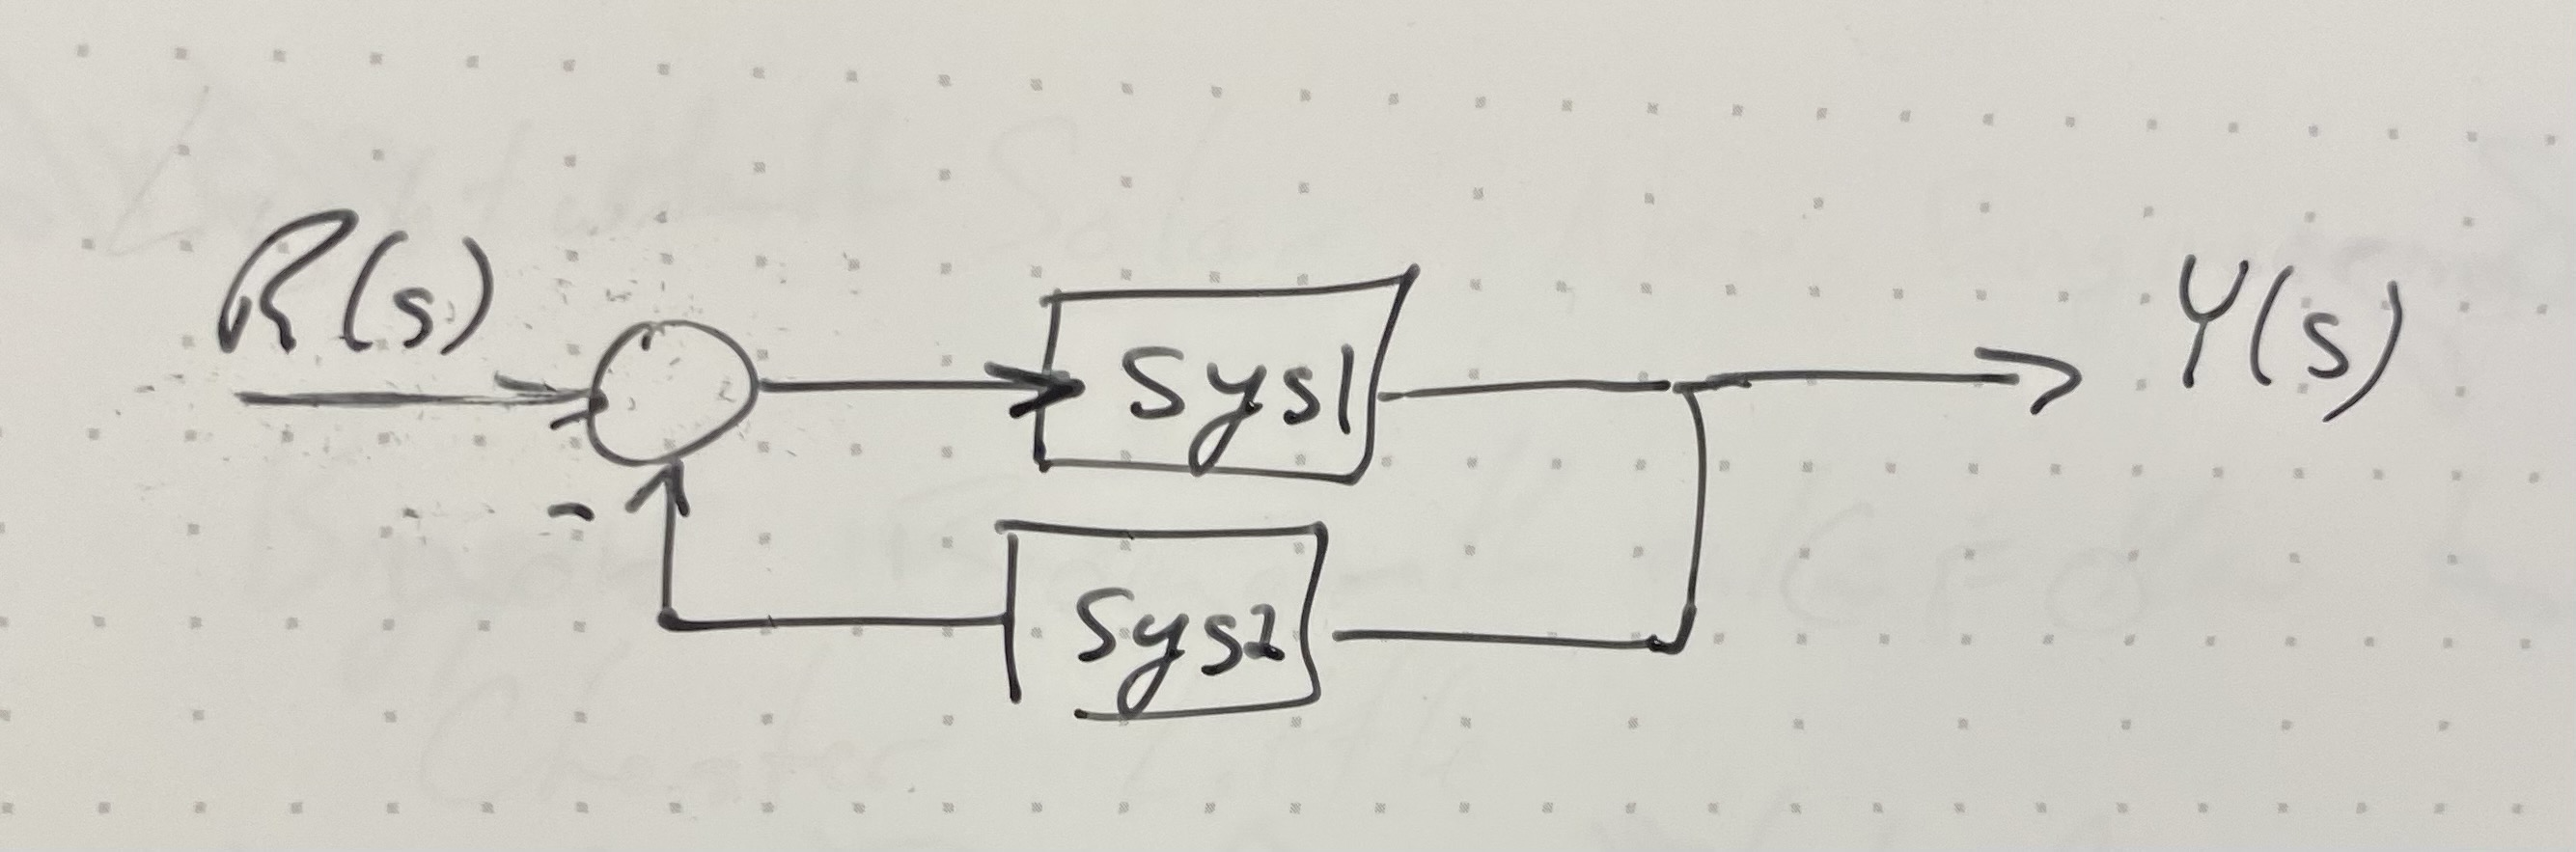

$$T(s)=\frac{Y(s)}{R(s)}$$

$$T(s) = \frac{\text{sys}_1}{1+\text{sys}_1 \text{sys}_2}$$

In [23]:
sys1 / (1 + sys1 * sys2)


            500 s^3 + 1000 s^2
-------------------------------------------
2.5e+05 s^5 + 5e+05 s^4 + 500 s^3 + 500 s^2

Note that this is indeed correct. It did not factor out $500s^2$. The feedback function will: 

In [24]:
ctrl.feedback(sys1, sys2)


          s + 2
--------------------------
500 s^3 + 1000 s^2 + s + 1

This actually highlights a problem we can have in control systems. Looking at the numerator of the first transfer function and the denominator, it's clear we have two poles and two zeros with the value of zero. We have what is called pole-zero cancellation. This can cause reliability issues because in reality, things can't be equal to infinite precision. So, the real world doesn't cancel, and results can become unpredictable if we don't account for it. So: I'm not a fan of simplifying. 

If we have positive feedback instead of negative feedback:

In [25]:
ctrl.feedback(sys1, sys2, 1)


          s + 2
--------------------------
500 s^3 + 1000 s^2 - s - 1

In the first case we leveraged that the default is $-1$.

In [26]:
ctrl.feedback(sys1, sys2, -1)


          s + 2
--------------------------
500 s^3 + 1000 s^2 + s + 1

**TIPs OF THE DAY!!!**

1. Use the tab key to complete things as you are typing them. 

2. Select to the left of a cell to do things like:

   a. 'a' to add a cell above
   
   b. 'b' to add a cell below
   
   c. 'h' to see everything (help) in jupyter notebook (**not jupyter lab**)
   
3. Hit shift-Tab when between the parentheses of a function to get help on that function. 

In [27]:
ng1 = [1]
dg1 = [1, 10]
sysg1 = ctrl.tf(ng1, dg1)
sysg1


  1
------
s + 10

In [28]:
ng2 = [1]
dg2 = [1, 1]
sysg2 = ctrl.tf(ng2, dg2)
sysg2


  1
-----
s + 1

In [29]:
ng3 = [1, 0, 1]
dg3 = [1, 4, 4]
sysg3 = ctrl.tf(ng3, dg3)
sysg3


   s^2 + 1
-------------
s^2 + 4 s + 4

In [30]:
ng4 = [1, 1]
dg4 = [1, 6]
sysg4 = ctrl.tf(ng4, dg4)
sysg4


s + 1
-----
s + 6

In [31]:
nh1 = [1, 1]
dh1 = [1, 2]
sysh1 = ctrl.tf(nh1, dh1)
sysh1


s + 1
-----
s + 2

In [32]:
nh2 = [2]
dh2 = [1]
sysh2 = ctrl.tf(nh2, dh2)
sysh2


2
-
1

In [33]:
nh3 = [1]
dh3 = [1]
sysh3 = ctrl.tf(nh3, dh3)
sysh3


1
-
1

In [34]:
sys1 = sysh2 / sysg4
sys1


2 s + 12
--------
  s + 1

In [35]:
sys2 = ctrl.series(sysg3, sysg4)
sys2


    s^3 + s^2 + s + 1
------------------------
s^3 + 10 s^2 + 28 s + 24

In [36]:
sys3 = ctrl.feedback(sys2, sysh1, +1)
sys3


s^4 + 3 s^3 + 3 s^2 + 3 s + 2
-----------------------------
 10 s^3 + 46 s^2 + 78 s + 47

In [37]:
sys4 = ctrl.series(sysg2, sys3)
sys4


    s^4 + 3 s^3 + 3 s^2 + 3 s + 2
--------------------------------------
10 s^4 + 56 s^3 + 124 s^2 + 125 s + 47

In [38]:
sys5 = ctrl.feedback(sys4, sys1)
sys5


      s^5 + 4 s^4 + 6 s^3 + 6 s^2 + 5 s + 2
------------------------------------------------
12 s^5 + 84 s^4 + 222 s^3 + 291 s^2 + 212 s + 71

In [39]:
sys6 = ctrl.series(sysg1, sys5)
sys6


              s^5 + 4 s^4 + 6 s^3 + 6 s^2 + 5 s + 2
----------------------------------------------------------------
12 s^6 + 204 s^5 + 1062 s^4 + 2511 s^3 + 3122 s^2 + 2191 s + 710

In [40]:
sys = ctrl.feedback(sys6, sysh3)
sys


              s^5 + 4 s^4 + 6 s^3 + 6 s^2 + 5 s + 2
----------------------------------------------------------------
12 s^6 + 205 s^5 + 1066 s^4 + 2517 s^3 + 3128 s^2 + 2196 s + 712

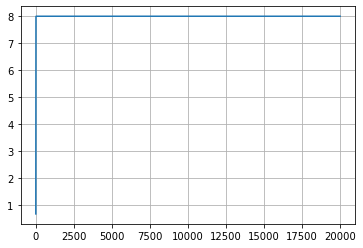

In [41]:
t, u = ctrl.step_response(ctrl.feedback(sys1, sys2, -1), np.linspace(0, 20000, 2000))
plt.plot(t, u)
plt.grid(True)

---------------------
I have no idea why this is in hear. I've forgotten, but I don't want to have to retype it when I remember
$$
\begin{aligned}
Y(s)= Y_{1}(s)+Y_{2}(s)=&\left[\frac{G_{1}(s) G_{2}(s) G_{3}(s) G_{4}(s)}{\left(1-G_{2}(s) H_{2}(s)\right)\left(1-G_{3}(s) H_{3}(s)\right)}\right.\\
&\left.+\frac{G_{5}(s) G_{6}(s) G_{7}(s) G_{8}(s)}{\left(1-G_{6}(s) H_{6}(s)\right)\left(1-G_{7}(s) H_{7}(s)\right)}\right] R(s)
\end{aligned}
$$